In [60]:
# ###################################
# Group ID: 222
# Members: Adrián Gómez Repollés, Kresten Johansen, Misbah Unnisa, Mohammadali Zakeriharandi
# Date: 20/03/2024
# Lecture: 6 and 7; LDA and SVM
# Dependencies: Numpy, Scipy, Scikit-Learn and Matplotlib.
# Python version: 3.12.2
# Functionality: Jupyter notebook to classify the MNIST dataset using SVM after proyecting the data using PCA and LDA for 2 and 9 dimensions.
# ###################################

## Day3 - Exercises

Perform classification for the entire dataset based on the algorithms introduced: Using LDA for dimensionality reduction (to 2 or 9 dimensions; LDA code "LDA.m" under the folder "Data and code" above) and compare PCA with LDA.

As an option, you can perform the classification by using LIBSVM -- A Library for Support Vector Machines. Using all of the 784-dimensional training data to train SVMs for all classes will take a substantial amount of time (hours), so you may choose the first (for easy comparison) 10% of the training data for training and all of the test data for testing to proof the concept.

In [260]:
## Imports
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

**Load train and test data with training down-sampling**

In [105]:
## Load data
def load_data(downsample_train = None):
    # Data
    mnist = sio.loadmat('Data/mnist_all.mat')

    # Train
    trains = [mnist[i].astype(np.float32) / 255 for i in mnist.keys() if "train" in i]
    if downsample_train == None:
        X_train = np.concatenate(trains, axis=0)
        y_train = [np.repeat(i, trains[i].shape[0]) for i in range(10)]
    else:
        subset_trains = []
        for array in trains:
            length = array.shape[0]
            size = int(np.round(length * downsample_train))
            idx = np.random.randint(array.shape[0], size=size)
            subset_trains.append(array[idx,:])
        X_train = np.concatenate(subset_trains, axis=0)
        y_train = [np.repeat(i, subset_trains[i].shape[0]) for i in range(10)]
        y_train = np.concatenate(y_train)

    # Test
    tests = [mnist[i].astype(np.float32) / 255 for i in mnist.keys() if "test" in i]
    X_test = np.concatenate(tests, axis=0)
    y_test = [np.repeat(i, tests[i].shape[0]) for i in range(10)]
    y_test = np.concatenate(y_test)

    # Return
    return(X_train, y_train, X_test, y_test)

My computer would struggle with such a large set of training images. Therefore, I am going to subset the training set keeping the proportions between different labels. The test set would be kept as it is.

In [118]:
# Downsample Train-Test split data
X_train, y_train, X_test, y_test = load_data(downsample_train=0.10) # 10% of data

**PCA**

In [310]:
# Dimension: 2
pca2 = PCA(n_components=2)
pca2_train = pca2.fit_transform(X_train)
pca2_test = pca2.fit_transform(X_test)

In [311]:
# Dimension: 9
pca9 = PCA(n_components=9)
pca9_train = pca9.fit_transform(X_train)
pca9_test = pca9.fit_transform(X_test)

**LDA**

In [312]:
# Dimension: 2
lda2 = LinearDiscriminantAnalysis(solver="svd", n_components=2)
lda2 = lda2.fit(X_train, y_train)
lda2_train = lda2.transform(X_train)
lda2_test = lda2.transform(X_test)

In [313]:
# Dimension: 9
lda9 = LinearDiscriminantAnalysis(solver="svd", n_components=9)
lda9 = lda9.fit(X_train, y_train)
lda9_train = lda9.transform(X_train)
lda9_test = lda9.transform(X_test)

**SVM**

In [305]:
# SVM model
svm = SVC(kernel="rbf", decision_function_shape="ovo")

In [321]:
# PCA + SVM (D2)
svm_pca2 = svm.fit(pca2_train, y_train)
svm_pca2_pred_train = svm_pca2.predict(pca2_train)
svm_pca2_pred = svm_pca2.predict(pca2_test)

In [322]:
# LDA + SVM (D2)
svm_lda2 = svm.fit(lda2_train, y_train)
svm_lda2_pred_train = svm_lda2.predict(lda2_train)
svm_lda2_pred = svm_lda2.predict(lda2_test)

In [323]:
# PCA + SVM (D9)
svm_pca9 = svm.fit(pca9_train, y_train)
svm_pca9_pred_train = svm_pca9.predict(pca9_train)
svm_pca9_pred = svm_pca9.predict(pca9_test)

In [324]:
# LDA + SVM (D2)
svm_lda9 = svm.fit(lda9_train, y_train)
svm_lda9_pred_train = svm_lda9.predict(lda9_train)
svm_lda9_pred = svm_lda9.predict(lda9_test)

In [328]:
# Accuracies:

# Train
acc_pca2_train = accuracy_score(y_train, svm_pca2_pred_train)
acc_lda2_train = accuracy_score(y_train, svm_lda2_pred_train)
acc_pca9_train = accuracy_score(y_train, svm_pca9_pred_train)
acc_lda9_train = accuracy_score(y_train, svm_lda9_pred_train)

# Test
acc_pca2_test = accuracy_score(y_test, svm_pca2_pred)
acc_lda2_test = accuracy_score(y_test, svm_lda2_pred)
acc_pca9_test = accuracy_score(y_test, svm_pca9_pred)
acc_lda9_test = accuracy_score(y_test, svm_lda9_pred)

# Compare
print("Train:")
print(f"\tPCA + SVM accuracy (D2): {np.round(acc_pca2_train*100,2)}%")
print(f"\tLDA + SVM accuracy (D2): {np.round(acc_lda2_train*100,2)}%")
print(f"\tPCA + SVM accuracy (D9): {np.round(acc_pca9_train*100,2)}%")
print(f"\tLDA + SVM accuracy (D9): {np.round(acc_lda9_train*100,2)}%")

print("Test:")
print(f"\tPCA + SVM accuracy (D2): {np.round(acc_pca2_test*100,2)}%")
print(f"\tLDA + SVM accuracy (D2): {np.round(acc_lda2_test*100,2)}%")
print(f"\tPCA + SVM accuracy (D9): {np.round(acc_pca9_test*100,2)}%")
print(f"\tLDA + SVM accuracy (D9): {np.round(acc_lda9_test*100,2)}%")

Train:
	PCA + SVM accuracy (D2): 47.64%
	LDA + SVM accuracy (D2): 58.71%
	PCA + SVM accuracy (D9): 91.57%
	LDA + SVM accuracy (D9): 94.55%
Test:
	PCA + SVM accuracy (D2): 12.42%
	LDA + SVM accuracy (D2): 53.51%
	PCA + SVM accuracy (D9): 11.48%
	LDA + SVM accuracy (D9): 87.2%


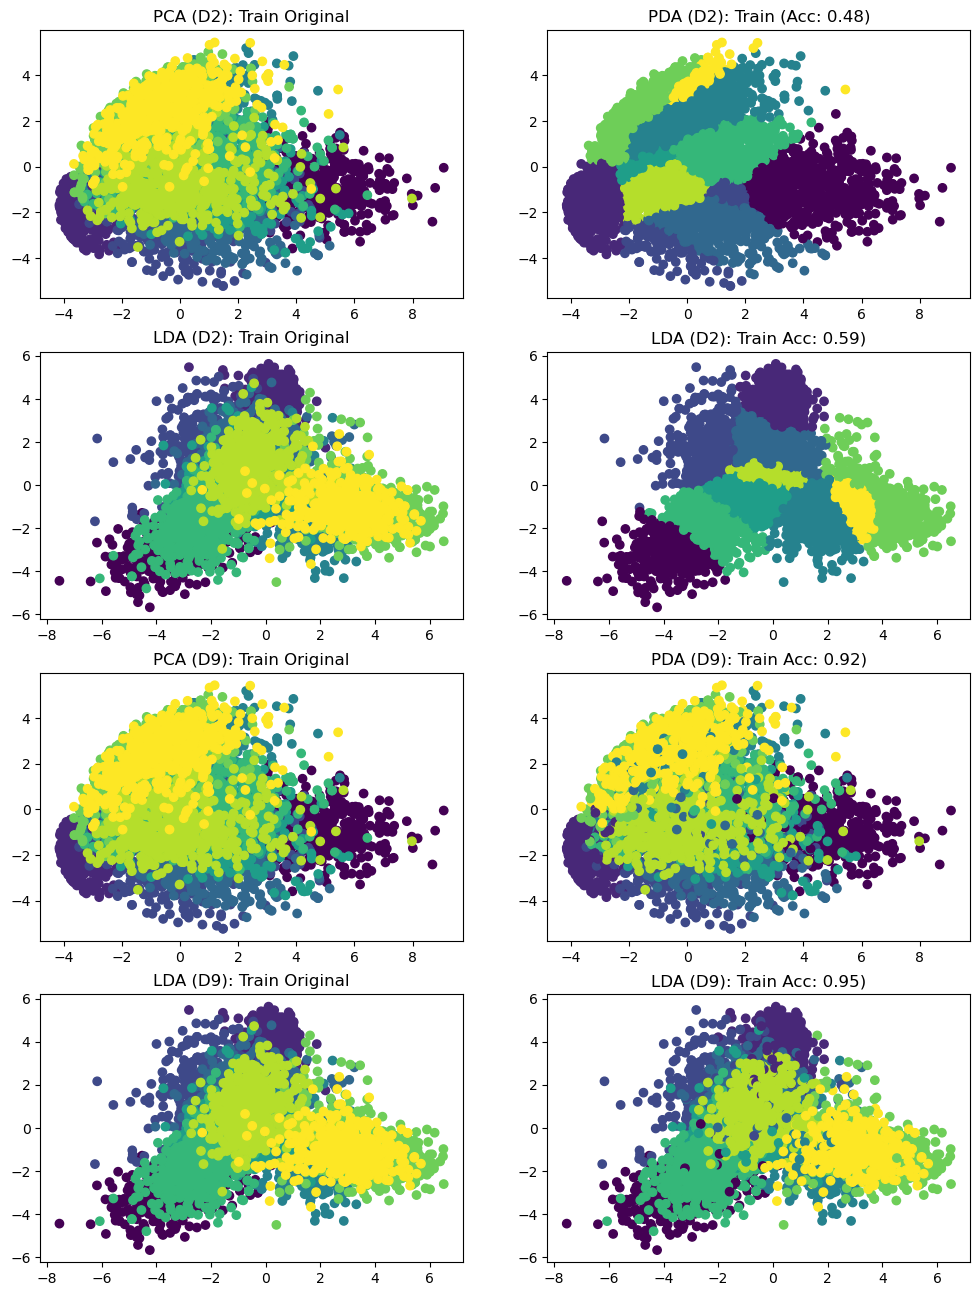

In [355]:
# Visualize datapoints: Train

# Figure layout
fig, ax = plt.subplots(4,2, figsize=(12,16))

# Scatter
ax[0][0].scatter(pca2_train[:,0], pca2_train[:,1], c=y_train)
ax[0][1].scatter(pca2_train[:,0], pca2_train[:,1], c=svm_pca2_pred_train)
ax[1][0].scatter(lda2_train[:,0], lda2_train[:,1], c=y_train)
ax[1][1].scatter(lda2_train[:,0], lda2_train[:,1], c=svm_lda2_pred_train)
ax[2][0].scatter(pca9_train[:,0], pca9_train[:,1], c=y_train)
ax[2][1].scatter(pca9_train[:,0], pca9_train[:,1], c=svm_pca9_pred_train)
ax[3][0].scatter(lda9_train[:,0], lda9_train[:,1], c=y_train)
ax[3][1].scatter(lda9_train[:,0], lda9_train[:,1], c=svm_lda9_pred_train)

# Labels
ax[0][0].set_title(f"PCA (D2): Train Original") # PCA2
ax[0][1].set_title(f"PDA (D2): Train (Acc: {np.round(acc_pca2_train,2)})")  # PCA2
ax[1][0].set_title(f"LDA (D2): Train Original") # LDA2
ax[1][1].set_title(f"LDA (D2): Train Acc: {np.round(acc_lda2_train,2)})")  # LDA2
ax[2][0].set_title(f"PCA (D9): Train Original") # PCA9
ax[2][1].set_title(f"PDA (D9): Train Acc: {np.round(acc_pca9_train,2)})")  # PCA9
ax[3][0].set_title(f"LDA (D9): Train Original") # LDA9
ax[3][1].set_title(f"LDA (D9): Train Acc: {np.round(acc_lda9_train,2)})")  # LDA9

# Show
plt.show()

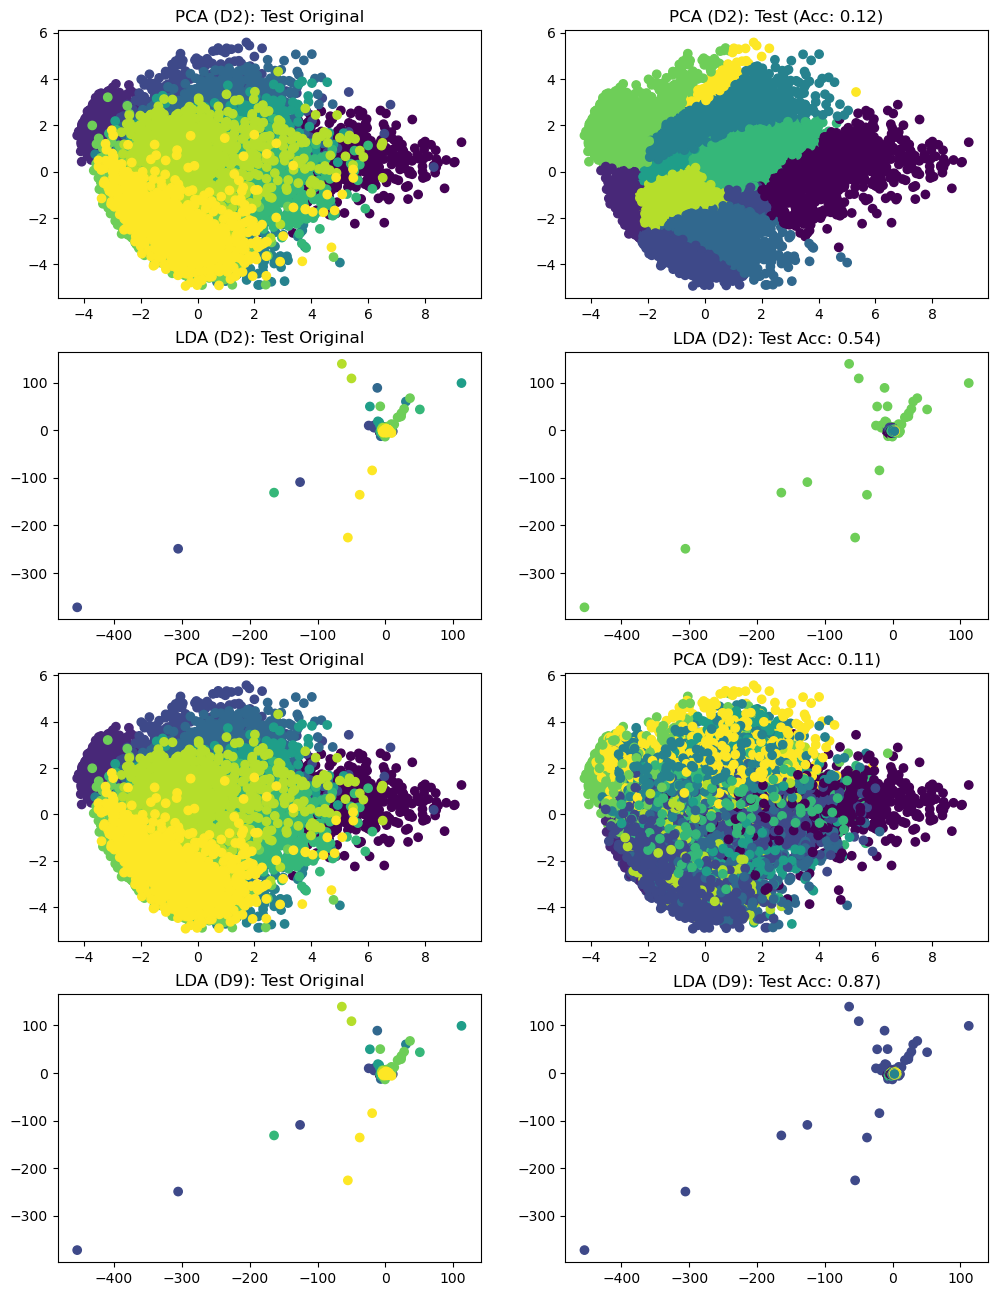

In [358]:
# Visualize datapoints: Test

# Figure layout
fig, ax = plt.subplots(4,2, figsize=(12,16))

# Scatter
ax[0][0].scatter(pca2_test[:,0], pca2_test[:,1], c=y_test)
ax[0][1].scatter(pca2_test[:,0], pca2_test[:,1], c=svm_pca2_pred)
ax[1][0].scatter(lda2_test[:,0], lda2_test[:,1], c=y_test)
ax[1][1].scatter(lda2_test[:,0], lda2_test[:,1], c=svm_lda2_pred)
ax[2][0].scatter(pca9_test[:,0], pca9_test[:,1], c=y_test)
ax[2][1].scatter(pca9_test[:,0], pca9_test[:,1], c=svm_pca9_pred)
ax[3][0].scatter(lda9_test[:,0], lda9_test[:,1], c=y_test)
ax[3][1].scatter(lda9_test[:,0], lda9_test[:,1], c=svm_lda9_pred)

# Labels
ax[0][0].set_title(f"PCA (D2): Test Original") # PCA2
ax[0][1].set_title(f"PCA (D2): Test (Acc: {np.round(acc_pca2_test,2)})")  # PCA2
ax[1][0].set_title(f"LDA (D2): Test Original") # LDA2
ax[1][1].set_title(f"LDA (D2): Test Acc: {np.round(acc_lda2_test,2)})")  # LDA2
ax[2][0].set_title(f"PCA (D9): Test Original") # PCA9
ax[2][1].set_title(f"PCA (D9): Test Acc: {np.round(acc_pca9_test,2)})")  # PCA9
ax[3][0].set_title(f"LDA (D9): Test Original") # LDA9
ax[3][1].set_title(f"LDA (D9): Test Acc: {np.round(acc_lda9_test,2)})")  # LDA9

# Show
plt.show()

In [375]:
# Confusion matrices:

# Train
cm_pca2_train = np.round(confusion_matrix(y_train, svm_pca2_pred_train, labels=svm_pca2.classes_, normalize='true'),2)
vcm_pca2_train = ConfusionMatrixDisplay(confusion_matrix=cm_pca2_train, display_labels=svm_pca2.classes_)

cm_lda2_train = np.round(confusion_matrix(y_train, svm_lda2_pred_train, labels=svm_lda2.classes_, normalize='true'),2)
vcm_lda2_train = ConfusionMatrixDisplay(confusion_matrix=cm_lda2_train, display_labels=svm_lda2.classes_)

cm_pca9_train = np.round(confusion_matrix(y_train, svm_pca9_pred_train, labels=svm_pca9.classes_, normalize='true'),2)
vcm_pca9_train = ConfusionMatrixDisplay(confusion_matrix=cm_pca9_train, display_labels=svm_pca9.classes_)

cm_lda9_train = np.round(confusion_matrix(y_train, svm_lda9_pred_train, labels=svm_lda9.classes_, normalize='true'),2)
vcm_lda9_train = ConfusionMatrixDisplay(confusion_matrix=cm_lda9_train, display_labels=svm_lda9.classes_)


# Test
cm_pca2_test = np.round(confusion_matrix(y_test, svm_pca2_pred, labels=svm_pca2.classes_, normalize='true'),2)
vcm_pca2_test = ConfusionMatrixDisplay(confusion_matrix=cm_pca2_test, display_labels=svm_pca2.classes_)

cm_lda2_test = np.round(confusion_matrix(y_test, svm_lda2_pred, labels=svm_lda2.classes_, normalize='true'),2)
vcm_lda2_test = ConfusionMatrixDisplay(confusion_matrix=cm_lda2_test, display_labels=svm_lda2.classes_)

cm_pca9_test = np.round(confusion_matrix(y_test, svm_pca9_pred, labels=svm_pca9.classes_, normalize='true'),2)
vcm_pca9_test = ConfusionMatrixDisplay(confusion_matrix=cm_pca9_test, display_labels=svm_pca9.classes_)

cm_lda9_test = np.round(confusion_matrix(y_test, svm_lda9_pred, labels=svm_lda9.classes_, normalize='true'),2)
vcm_lda9_test = ConfusionMatrixDisplay(confusion_matrix=cm_lda9_test, display_labels=svm_lda9.classes_)

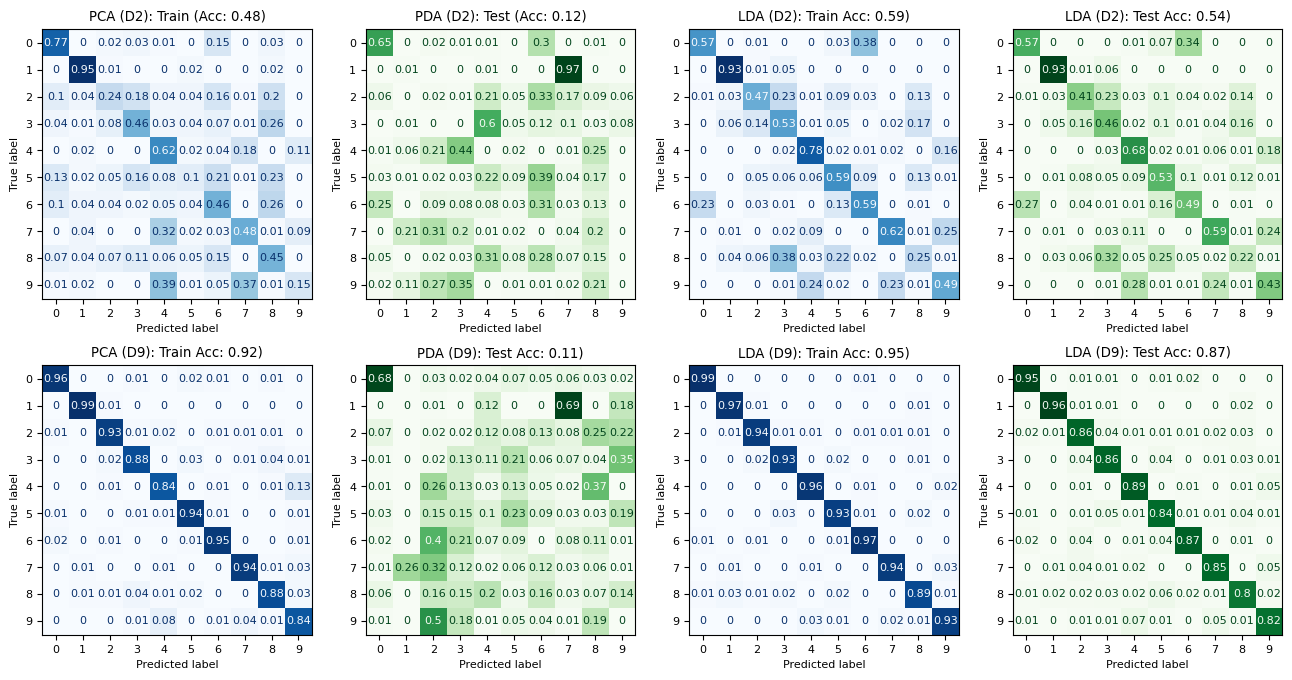

In [388]:
# Plot confusion matrices

# Figure layout
fig, ax = plt.subplots(2,4, figsize=(16,8))
plt.rcParams.update({'font.size': 8})

# Confusion matrices
vcm_pca2_train.plot(ax=ax[0][0], cmap="Blues", colorbar=None) # PCA2
vcm_pca2_test.plot(ax=ax[0][1], cmap="Greens", colorbar=None) # PCA2
vcm_lda2_train.plot(ax=ax[0][2], cmap="Blues", colorbar=None) # LDA2
vcm_lda2_test.plot(ax=ax[0][3], cmap="Greens", colorbar=None) # LDA2
vcm_pca9_train.plot(ax=ax[1][0], cmap="Blues", colorbar=None) # PCA9
vcm_pca9_test.plot(ax=ax[1][1], cmap="Greens", colorbar=None) # PCA9
vcm_lda9_train.plot(ax=ax[1][2], cmap="Blues", colorbar=None) # LDA9
vcm_lda9_test.plot(ax=ax[1][3], cmap="Greens", colorbar=None) # LDA9

# Labels
ax[0][0].set_title(f"PCA (D2): Train (Acc: {np.round(acc_pca2_train,2)})") # PCA2
ax[0][1].set_title(f"PCA (D2): Test (Acc: {np.round(acc_pca2_test,2)})")  # PCA2
ax[0][2].set_title(f"LDA (D2): Train Acc: {np.round(acc_lda2_train,2)})") # LDA2
ax[0][3].set_title(f"LDA (D2): Test Acc: {np.round(acc_lda2_test,2)})")  # LDA2
ax[1][0].set_title(f"PCA (D9): Train Acc: {np.round(acc_pca9_train,2)})") # PCA9
ax[1][1].set_title(f"PCA (D9): Test Acc: {np.round(acc_pca9_test,2)})")  # PCA9
ax[1][2].set_title(f"LDA (D9): Train Acc: {np.round(acc_lda9_train,2)})") # LDA9
ax[1][3].set_title(f"LDA (D9): Test Acc: {np.round(acc_lda9_test,2)})")  # LDA9

# Figure show
plt.show()

-------------------

### Extra

**Search for best LDA model**

In [123]:
# Define model
lda = LinearDiscriminantAnalysis(solver="svd")

# Parameters
ncomps = np.arange(2,10,1)
param_grid = {
    'n_components': ncomps,
}

# Find best model
lda_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, n_jobs=2, verbose=3, scoring='f1_micro', return_train_score=True)
lda_search.fit(X_train, y_train)

# Fit best model

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 2/5] END n_components=2;, score=(train=0.912, test=0.829) total time=   1.1s
[CV 1/5] END n_components=2;, score=(train=0.917, test=0.835) total time=   1.3s
[CV 3/5] END n_components=2;, score=(train=0.913, test=0.840) total time=   0.8s
[CV 4/5] END n_components=2;, score=(train=0.915, test=0.838) total time=   1.4s
[CV 5/5] END n_components=2;, score=(train=0.917, test=0.832) total time=   1.2s
[CV 1/5] END n_components=3;, score=(train=0.917, test=0.835) total time=   0.9s
[CV 2/5] END n_components=3;, score=(train=0.912, test=0.829) total time=   1.3s
[CV 3/5] END n_components=3;, score=(train=0.913, test=0.840) total time=   1.2s
[CV 4/5] END n_components=3;, score=(train=0.915, test=0.838) total time=   1.1s
[CV 5/5] END n_components=3;, score=(train=0.917, test=0.832) total time=   1.3s
[CV 1/5] END n_components=4;, score=(train=0.917, test=0.835) total time=   1.2s
[CV 2/5] END n_components=4;, score=(train=0.912,

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=2,
             param_grid={'n_components': array([2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, scoring='f1_micro', verbose=3)

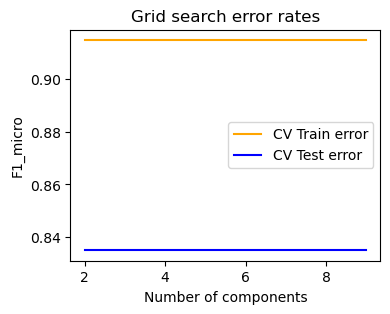

In [127]:
# Plot train and test error
components = ncomps
train_error = lda_search.cv_results_['mean_train_score']
test_error = lda_search.cv_results_['mean_test_score']

plt.figure(figsize=(4,3))
plt.plot(components, train_error, color="orange", label="CV Train error")
plt.plot(components, test_error, color="blue", label="CV Test error")
plt.xlabel('Number of components')
plt.ylabel('F1_micro')
plt.title('Grid search error rates')
plt.legend()

In [223]:
# Fit best model
best_lda = lda_search.best_estimator_.fit(X_train, y_train)
train_pred_lda = best_lda.predict(X_train)
test_pred_lda = best_lda.predict(X_test)

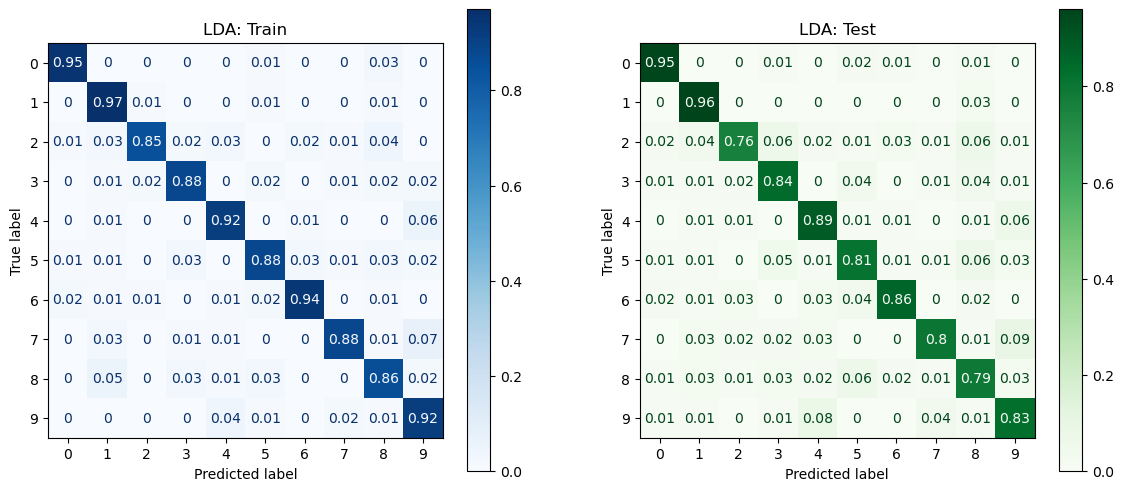

In [183]:
# Confusion matrices
cm_lda_train = np.round(confusion_matrix(y_train, train_pred, labels=best_lda.classes_, normalize='true'),2)
vcm_lda_train = ConfusionMatrixDisplay(confusion_matrix=cm_lda_train, display_labels=best_lda.classes_)

cm_lda_test = np.round(confusion_matrix(y_test, test_pred, labels=best_lda.classes_, normalize='true'),2)
vcm_lda_test = ConfusionMatrixDisplay(confusion_matrix=cm_lda_test, display_labels=best_lda.classes_)

fig, ax = plt.subplots(1,2, figsize=(14,6))
vcm_lda_train.plot(ax=ax[0], cmap="Blues")
vcm_lda_test.plot(ax=ax[1], cmap="Greens")
ax[0].set_title("LDA: Train")
ax[1].set_title("LDA: Test")
plt.show()

**Implement SVM as multi-class classifier for original data**

In [129]:
# Define model
svm = SVC(kernel="rbf", decision_function_shape="ovo")

# Parameters
param_grid = {
    'C': np.arange(0.001, 1.5, 0.2),
}

# Find best model
svc_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=3, verbose=3, scoring='f1_micro', return_train_score=True)
svc_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......C=0.001;, score=(train=0.112, test=0.113) total time=  55.0s
[CV 2/5] END .......C=0.001;, score=(train=0.113, test=0.112) total time=  56.5s
[CV 3/5] END .......C=0.001;, score=(train=0.112, test=0.113) total time=  57.9s
[CV 1/5] END .......C=0.201;, score=(train=0.947, test=0.931) total time=  20.6s
[CV 4/5] END .......C=0.001;, score=(train=0.112, test=0.113) total time=  43.6s
[CV 5/5] END .......C=0.001;, score=(train=0.112, test=0.113) total time=  43.9s
[CV 2/5] END .......C=0.201;, score=(train=0.946, test=0.933) total time=  13.6s
[CV 3/5] END .......C=0.201;, score=(train=0.944, test=0.933) total time=  19.2s
[CV 4/5] END .......C=0.201;, score=(train=0.946, test=0.926) total time=  19.6s
[CV 5/5] END .......C=0.201;, score=(train=0.946, test=0.929) total time=  19.0s
[CV 1/5] END .......C=0.401;, score=(train=0.965, test=0.940) total time=  13.5s
[CV 2/5] END .......C=0.401;, score=(train=0.964,

GridSearchCV(cv=5, estimator=SVC(decision_function_shape='ovo'), n_jobs=3,
             param_grid={'C': array([1.000e-03, 2.010e-01, 4.010e-01, 6.010e-01, 8.010e-01, 1.001e+00,
       1.201e+00, 1.401e+00])},
             return_train_score=True, scoring='f1_micro', verbose=3)

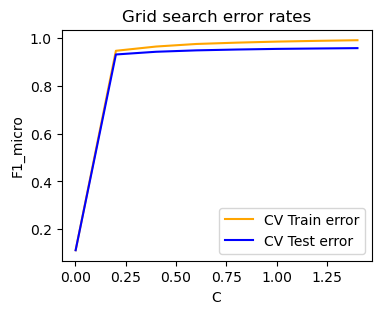

In [132]:
# Plot train and test error
cs = np.arange(0.001, 1.5, 0.2)
train_error = svc_search.cv_results_['mean_train_score']
test_error = svc_search.cv_results_['mean_test_score']

plt.figure(figsize=(4,3))
plt.plot(cs, train_error, color="orange", label="CV Train error")
plt.plot(cs, test_error, color="blue", label="CV Test error")
plt.xlabel('C')
plt.ylabel('F1_micro')
plt.title('Grid search error rates')
plt.legend()

In [222]:
# Fit best model
best_svc = svc_search.best_estimator_.fit(X_train, y_train)
train_pred_svc = best_svc.predict(X_train)
test_pred_scv = best_svc.predict(X_test)

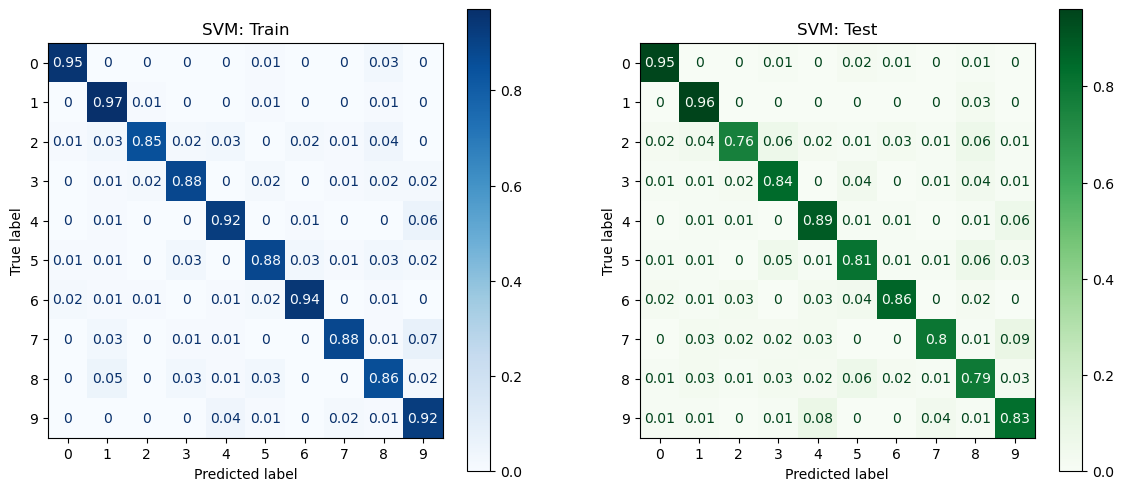

In [182]:
# Confusion matrix: Train
cm_svm_train = np.round(confusion_matrix(y_train, train_pred, labels=best_svc.classes_, normalize='true'),2)
vcm_svm_train = ConfusionMatrixDisplay(confusion_matrix=cm_svm_train, display_labels=best_svc.classes_)

cm_svm_test = np.round(confusion_matrix(y_test, test_pred, labels=best_svc.classes_, normalize='true'),2)
vcm_svm_test = ConfusionMatrixDisplay(confusion_matrix=cm_svm_test, display_labels=best_svc.classes_)

fig, ax = plt.subplots(1,2, figsize=(14,6))
vcm_svm_train.plot(ax=ax[0], cmap="Blues")
vcm_svm_test.plot(ax=ax[1], cmap="Greens")
ax[0].set_title("SVM: Train")
ax[1].set_title("SVM: Test")
plt.show()

**Compare accuracies**

In [234]:
# Comparison between LDA and SVM as classifiers
print(f"LDA accuracy: {np.round(accuracy_score(y_test, test_pred_lda)*100,2)}%")
print(f"SVM accuracy: {np.round(accuracy_score(y_test, test_pred_scv)*100,2)}0%")

LDA accuracy: 84.86%
SVM accuracy: 95.90%
